# QuantCast Campaign Performance Assessment
In this notebook we are going to be reviewing performance data from an anonymous campaign. We'll be reviewing typical campaign performance metrics such as: 
- Impressions = number of ads shown
- Clicks = Number of clicks on the ad shown
- Conversions = number of purchases on the client’s website, e..g a person who saw the client’s ad later bought a pair of shoes on the client’s website.
- Cost = cost of purchasing the impressions
- Click Through Rate % (CTR) = Click / Impressions
- Cost per Action (CPA) = Cost / Conversions
- Conversion Rate % (CVR) = Conversion / Impressions

After reviewing the data we'll address the following questions and draw final conclusions:
- What type of trends do you see in the performance data? 
- What is your recommendation based on these trends? 
- If you were managing this campaign – what are some suggestions you could make to the client?

In [306]:
import pandas as pd
data = pd.read_csv("Downloads/CS Interview Test Question Data - Data Viz.csv")
data.head(5)

,Date,Impressions,Clicks,Conversions,Budget Delivered
0,1/1/2019,"11,506,995","1,672",88,"$12,124.14"
1,1/2/2019,"9,394,458","1,516",179,"$9,838.45"
2,1/3/2019,"4,696,388",878,129,"$6,858.67"
3,1/4/2019,"8,987,784","1,179",107,"$9,566.55"
4,1/5/2019,"8,923,751","1,171",88,"$9,322.50"


In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                365 non-null    object
 1   Impressions         365 non-null    object
 2   Clicks              365 non-null    object
 3   Conversions         365 non-null    int64 
 4    Budget Delivered   365 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.4+ KB


## Cleaning the Data for Analysis
Although we have our dataset, we need to convert the `Date` to a datetime object and `Impressions`, `Clicks`, and `Budget Delivered` columns to integers and float values for analysis.

In [308]:
import numpy as np
data = pd.read_csv("Downloads/CS Interview Test Question Data - Data Viz.csv", parse_dates=[0], encoding="UTF-8")

In [309]:
def int_converter(value):
    new_value = int(value.replace(",", "").replace("$",""))
    return new_value

def float_converter(value):
    new_value = float(value.replace(",", "").replace("$",""))
    return new_value

data['Impressions'] = data['Impressions'].apply(int_converter)
data['Clicks'] = data['Clicks'].apply(int_converter)
data[' Budget Delivered '] = data[' Budget Delivered '].apply(float_converter)

In [310]:
print(data.columns)

Index(['Date', 'Impressions', 'Clicks', 'Conversions', ' Budget Delivered '], dtype='object')


In [311]:
data.head(5)

,Date,Impressions,Clicks,Conversions,Budget Delivered
0,2019-01-01,11506995,1672,88,12124.14
1,2019-01-02,9394458,1516,179,9838.45
2,2019-01-03,4696388,878,129,6858.67
3,2019-01-04,8987784,1179,107,9566.55
4,2019-01-05,8923751,1171,88,9322.50


In [312]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                365 non-null    datetime64[ns]
 1   Impressions         365 non-null    int64         
 2   Clicks              365 non-null    int64         
 3   Conversions         365 non-null    int64         
 4    Budget Delivered   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 14.4 KB


## Summary Statistics
With our cleaned data we can now take a look at the over all performance of the campaign. We'll use summary statistics to get an overview of the campaign and then deep dive into the campaign's story.

In [313]:
data['count_of_days'] = data.shape[0]
data.pivot_table(index='count_of_days', values=['Impressions', 'Clicks', 'Conversions', ' Budget Delivered '], aggfunc="sum")

,Budget Delivered,Clicks,Conversions,Impressions
count_of_days,,,,
365,4127477.06,741853,29914,4020164316


From the summary table above we can see that the campaign ran for a full year. It delivered 4,020,164,316 impressions at a cost of $4,127,477.06. The campaign recorded 741,853 clicks and 29,914 conversions. 

Let's use some of the information in these columns to identify the `CTR`, `CPA`, and `Conversion Rate`

In [314]:
data['CTR'] = data['Clicks']/data['Impressions']*100
data['CPA'] = data[' Budget Delivered ']/data['Conversions']
data['conversion_rate'] = data['Conversions']/data['Impressions']*100
data

,Date,Impressions,Clicks,Conversions,Budget Delivered,count_of_days,CTR,CPA,conversion_rate
0,2019-01-01,11506995,1672,88,12124.14,365,0.014530,137.774318,0.000765
1,2019-01-02,9394458,1516,179,9838.45,365,0.016137,54.963408,0.001905
2,2019-01-03,4696388,878,129,6858.67,365,0.018695,53.167984,0.002747
3,2019-01-04,8987784,1179,107,9566.55,365,0.013118,89.407009,0.001191
4,2019-01-05,8923751,1171,88,9322.50,365,0.013122,105.937500,0.000986
...,...,...,...,...,...,...,...,...,...
360,2019-12-27,8171743,1206,37,12471.14,365,0.014758,337.057838,0.000453
361,2019-12-28,7292646,1331,26,10764.17,365,0.018251,414.006538,0.000357
362,2019-12-29,6432027,1093,41,9176.01,365,0.016993,223.805122,0.000637
363,2019-12-30,5978860,1073,43,8436.32,365,0.017947,196.193488,0.000719


In [315]:
data['CTR'].describe()

count    365.000000
mean       0.019153
std        0.003398
min        0.011055
25%        0.016464
50%        0.018943
75%        0.021319
max        0.031708
Name: CTR, dtype: float64

In [316]:
data['CPA'].describe()

count    365.000000
mean     160.000328
std      123.025994
min        4.247711
25%      102.891193
50%      125.323909
75%      161.885765
max      828.826731
Name: CPA, dtype: float64

## Visualization: Impressions/Budget Spend for Campaign Duration
To get a sense of the overall campaign performance we want to visualize the impression volumes for each month over the year. In order to do this we'll need to update our dataset to get the month values for each row

In [317]:
data['month'] = data['Date'].dt.month

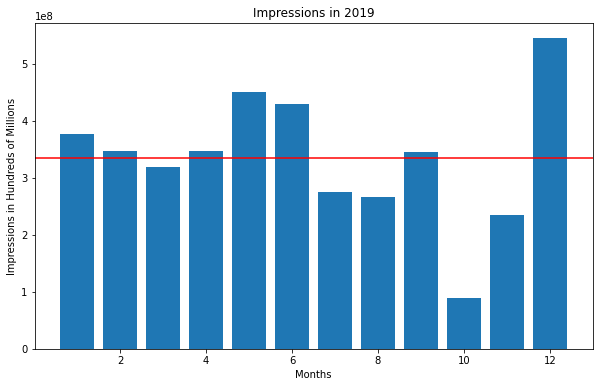

In [318]:
import matplotlib.pyplot as plt
%matplotlib inline 
months = data['month'].unique()
plt.figure(figsize=(10,6))
plt.bar(months, imps_by_month)
avg_imps = imps_by_month.mean()
plt.xticks(rotation=0)
plt.axhline(avg_imps, c="red")
plt.ylabel("Impressions in Hundreds of Millions")
plt.xlabel("Months")
plt.title("Impressions in 2019")
plt.show()

From the above chart we can see that the campaign did not perform as consistently in the second-half of the year. From July to November only one month (Steptember) performed near the campaign average for impressions. December recorded the highest number of impressions of any month, but in comparison to the previous months, it appears this increase is a could be a result of under-delivery in the previous months.

Next let's take a look at the budget allocation and see if this matches with the impression volumes.

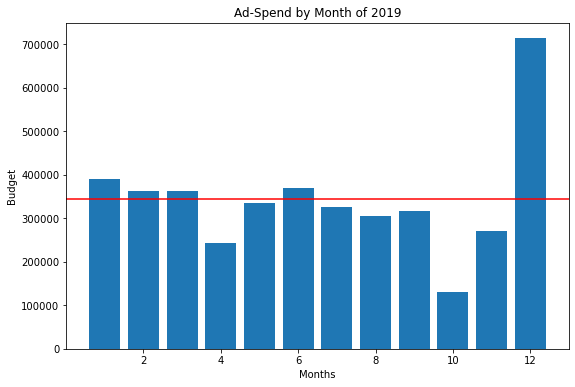

In [319]:
budget_by_month = data.groupby('month')[' Budget Delivered '].sum()
plt.figure(figsize=(9,6))
plt.bar(months, budget_by_month)
avg_budget = budget_by_month.mean()
plt.xticks(rotation=0)
plt.axhline(avg_budget, c="red")
plt.ylabel("Budget")
plt.xlabel("Months")
plt.title("Ad-Spend by Month of 2019")
plt.show()

As expected we see impression performance mirror the budget. From these two charts a reasonable conclusion is something happened in October that affected the budget and as a result affecting impressions. Let's take a look at another metric to get a better idea of the campaign performance.

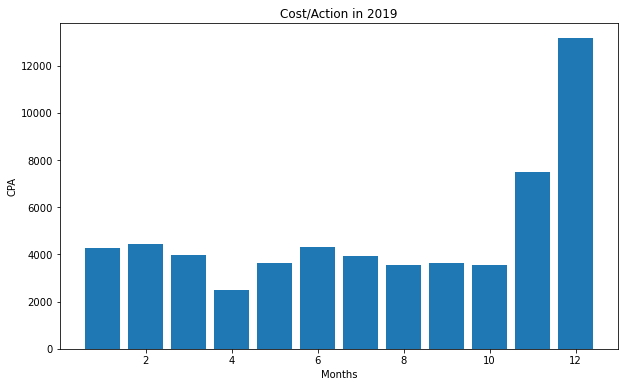

In [320]:
cpa_by_month = data.groupby('month')['CPA'].sum()
plt.figure(figsize=(10,6))
plt.bar(months, cpa_by_month)
plt.xticks(rotation=0)
plt.ylabel("CPA")
plt.xlabel("Months")
plt.title("Cost/Action in 2019")
plt.show()

From the above table it is clear that between October and November there was a change. Although budget was low in October the CPA remained in-line with the campaign. However the CPA significantly increased in November while budget still remained low. The Hypothesis is that there was a change in CPM that occured in November.

## Vizualization: Click-Thru and Conversion Rates
Our hypothesis is that something occured in November that caused the CPA to significantly increase. We're going to review the performance of the CTR and Conversion Rate to see how these metrics were impacting the campaign performance.

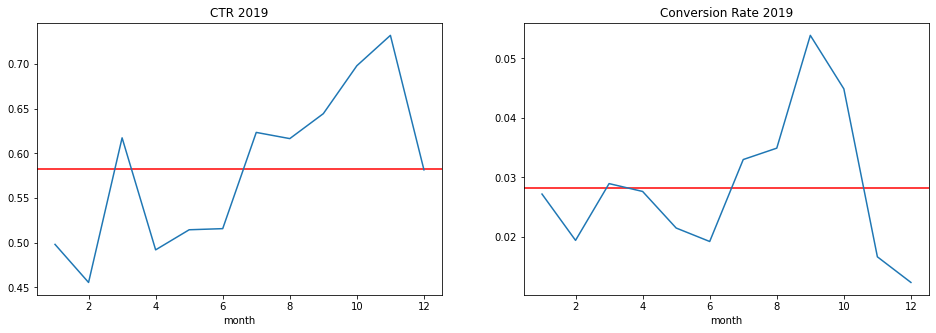

In [321]:
ctr = data.groupby('month')['CTR'].sum()
conv_rate = data.groupby('month')['conversion_rate'].sum()
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title("CTR 2019")
plt.axhline(ctr.mean(), c="red")
ctr.plot()
plt.subplot(1,2,2)
plt.title("Conversion Rate 2019")
plt.axhline(conv_rate.mean(), c="red")
conv_rate.plot()
plt.show()

After reviewing the CTR and Conversion Rates for the 2019 campaign, we can see some clear trends. The CTR of the campaign begins to perform above the average after six months. The CTR continues to increase, peaking in November. 

Similarly, the conversion rate of the campaign begins to pick up in the second-half of the year. The conversion rate performance continues to increase until peaking in Steptember. 

What is significant is the precipitous drop in both CTR and Conversion Rate after October. This coincides with the increase in in CPA observed in November and December and culminates problematically with the significant increase in the campaign budget in December.

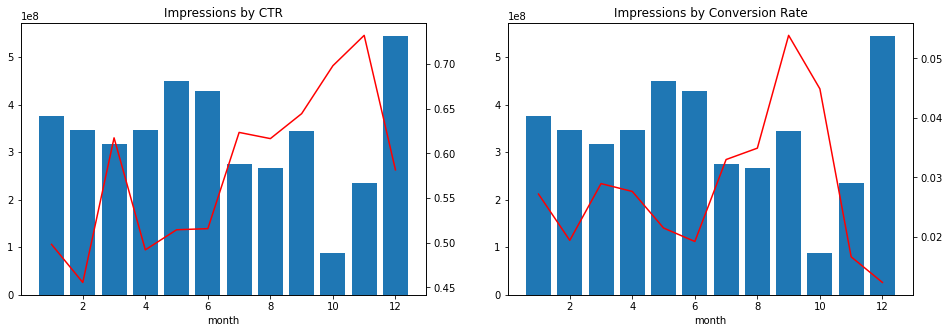

In [322]:
month_summary = data.groupby('month')[['Impressions', 'CTR', 'conversion_rate']].sum()
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title("Impressions by CTR")
plt.bar(months, month_summary['Impressions'])
month_summary['CTR'].plot(secondary_y=True, c="red")

plt.subplot(1,2,2)
plt.title("Impressions by Conversion Rate")
plt.bar(months, month_summary['Impressions'])
month_summary['conversion_rate'].plot(secondary_y=True, c="red")
plt.show()

## Conclusions
Hindsight is 20/20 and there are a few points in the campaign 2019 that deserve a deeper dive, yet nothing is more salient than the abrupt change in campaign performance in November. For the first six months, the 2019 campaign’s impressions, spend, and CTR, conversion rates are relatively consistent. A major change occurs in June/July; the campaign begins to find not only an audience but real customers as well. Impressions starting in June/July begin to decrease, but the engagement and conversions jump significantly, it is apparent that in these months (June - October) the campaign hit the sweet spot, finding the right audience for their product, realizing an increase in conversions. 

The good times roll until November. It is at this point that the performance of the campaign takes a serious hit. Although spend is not at its peak yet, the Cost/Action spikes as a result of the significant decrease in Conversion Rate. Interestingly, the CTR is at an all-time high in November. There is clearly a disconnect between the advertising experience and the site experience.

However, the situation worsens as the campaign moves into December. Not only, is spend the highest it has been for the campaign, the conversion rate has dropped to it’s lowest level. Similarly, the CTR rate has also dropped significantly. What is most concerning is the campaign is delivering more impressions than ever but conversions are not meeting pace. It’s clear from the lack of sales and the drop in engagement that something has negatively impacted the campaign. 

There are a few possible scenarios to explain the sudden change in campaign performance. The advertiser could be tone-deaf and there could have been a change in the creative/copy that resulted in consumer backlash. This would explain the sudden decrease in conversions while ad-spend soared to peak levels. The product could be seasonal. The campaign’s best performing months were between Spring, Summer and early Fall. Performance may have suffered as the calendar moved into the winter months. IT is also possible the advertiser changed tactics and began targeting a new and possibly more expensive audience who did not respond well to the marketing.

Although the potential causes for the share decline of the campaign are murky, the recommendations are more clear. In November the CTR performs at an all-time high, but the conversion rate drops significantly. Customers are driving to the site but not purchasing, indicating further review of the customer site experience is needed. Perhaps the check-out experience is confusing or perhaps customers are not able to find their desired product, whatever the case investigating the disconnect is paramount.

Additionally, campaign performance was at its best from June/July to October. It is reasonable to suggest the tactics employed at this juncture should be repeated. More information is needed to understand what was the creative direction, the audience targets, the publishers involved in the campaign. Nonetheless, it stands to reason that campaign performance would improve by replicating the tactics used during the June - October timeframe.